<a href="https://colab.research.google.com/github/Necromant24/saves/blob/main/%D0%9A%D0%92_%D0%BB%D0%B0%D0%B17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=8220ea02f56dcae0d6edea9ee605dc720f3f032052b91c0d639ecb5e75767528
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556

In [ ]:
import math
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
# Начальные установки
circle = 2*math.pi # длина окружности
n = 10 # число разрядов измерения
phase = 1/128 # оцениваемая фаза
qp = QuantumCircuit(n+1, n)
# Добавление H-гейтов в вычислительный регистр
for qubit in range(n):
  qp.h(qubit)
# Подготовка собственного состояния |ψ⟩
qp.x(n)
# Формирование управляемых U-гейтов
angle = circle*phase
repetitions = 1
for counting_qubit in range(n):
  for i in range(repetitions):
    qp.cp(angle, counting_qubit, n);
  repetitions *= 2
# Формирование схемы обратного преобразования QFT
qp = qp.compose(QFT(n, inverse=True), range(n))
# Измерение фазы
for j in range(n):
  qp.measure(j,j)
qp.draw()

┌───┐                                                            »
 q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
      ├───┤ │                                                          »
 q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
      ├───┤ │         │         │                                      »
 q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
      ├───┤ │         │         │         │         │         │        »
 q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_4: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_5: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_6: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_7: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_8: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │         │         │         │         │         │        »
 q_9: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
      ├───┤ │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64) »
q_10: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
      └───┘                                                            »
c: 10/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                            »
« q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                            »
« q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                            »
« q_2: ─■────────────────────────────────────────────────────────────────────»
«       │                                                                    »
« q_3: ─┼─────────■─────────■─────────■─────────■─────────■─────────■────────»
«       │         │         │         │         │         │         │        »
« q_4: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │         │         │         │         │         │         │        »
« q_5: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │         │         │         │         │         │         │        »
« q_6: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │         │         │         │         │         │         │        »
« q_7: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │         │         │         │         │         │         │        »
« q_8: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │         │         │         │         │         │         │        »
« q_9: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«       │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64)  │P(π/64) »
«q_10: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                            »
«c: 10/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                            »
« q_0: ──────────────────────────────────────────────────────────────────────»
«                                               

Амплитуды вероятности: {'0000001000': 4096}


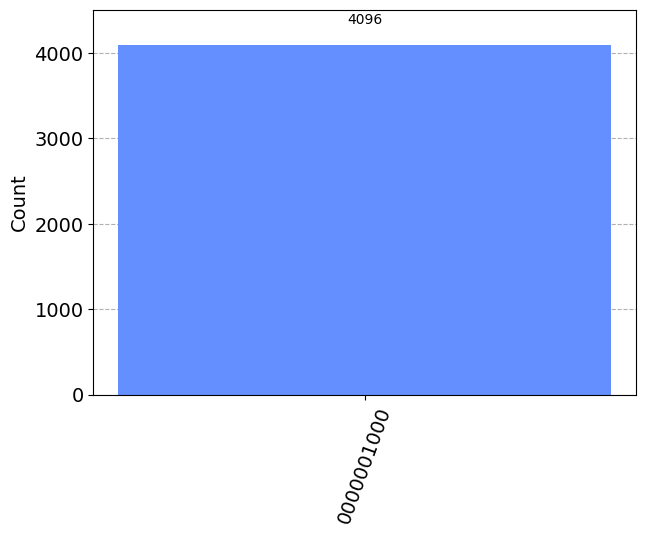

In [ ]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')
t_qp = transpile(qp, aer_sim)
results = aer_sim.run(t_qp, shots=4096).result()
answer = results.get_counts()
print("Амплитуды вероятности:",answer)
plot_histogram(answer)

https://docs.google.com/spreadsheets/d/1lEQCnx8J235g8oKNaHnFu_uvlK8ywBkyxoxYoKlpkzg/edit?usp=sharing